In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from jinja2 import Environment, FileSystemLoader, PackageLoader,select_autoescape
from weasyprint import HTML
import argparse


/home/monika/anaconda3/lib/python3.7/site-packages/weasyprint/document.py:36: UserWarning: There are known rendering problems and missing features with cairo < 1.15.4. WeasyPrint may work with older versions, but please read the note about the needed cairo version on the "Install" page of the documentation before reporting bugs. http://weasyprint.readthedocs.io/en/latest/install.html
  'There are known rendering problems and missing features with '


## 1. Data upload from *.csv file

In [2]:
df = pd.read_csv("/home/monika/Pulpit/Analiza ML Deep L/data092020.csv", low_memory=False)

## 2. Data clean up

In [3]:
df.head()

,Customer - Street,Customer - city,Customer - ZIP,Customer - Name,Customer - Last name,Customer - Phone Number,Customer - Email,Customer - ID,Transaction - Date,Transaction - Product,Transaction - Category,Transaction - value
0,ul. Jabłoni 133,Mikołów,43-195,Anastazy,Gorski,69 463 70 14,AnastazyGorski@rhyta.com,93942878199,01/06/19,WCKDG0,Shoes,270
1,ul. Brzozowa 7,Gryfice,72-302,Klementyna,Jaworska,79 241 25 29,KlementynaJaworska@rhyta.com,88321897199,22/08/17,WPUG1Y,Dress,126
2,ul. Chmielna 80,Katowice,40-655,Radosława,Jaworska,60 547 89 25,RadoslawaJaworska@jourrapide.com,91450567099,10/05/17,SPZMMU,Poloshirt,334
3,ul. Długa 147,Zabrze,41-800,Ewa,Pawlak,60 136 40 08,EwaPawlak@armyspy.com,19607888799,29/11/18,F7U2HD,Dress,329
4,ul. Dziubińskiej Heleny 149,Lublin,20-252,Elżbieta,Majewska,79 400 67 58,ElzbietaMajewska@gustr.com,72485440099,15/03/17,32DCQA,T-shirt,42


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12119 entries, 0 to 12118
Data columns (total 12 columns):
Customer - Street          12119 non-null object
Customer - city            12119 non-null object
Customer - ZIP             12119 non-null object
Customer - Name            12119 non-null object
Customer - Last name       12119 non-null object
Customer - Phone Number    12119 non-null object
Customer - Email           12119 non-null object
Customer - ID              12119 non-null object
Transaction - Date         12119 non-null object
Transaction - Product      12089 non-null object
Transaction - Category     12088 non-null object
Transaction - value        12088 non-null object
dtypes: object(12)
memory usage: 9.9 MB


In [5]:
df.dtypes

Customer - Street          object
Customer - city            object
Customer - ZIP             object
Customer - Name            object
Customer - Last name       object
Customer - Phone Number    object
Customer - Email           object
Customer - ID              object
Transaction - Date         object
Transaction - Product      object
Transaction - Category     object
Transaction - value        object
dtype: object

In [6]:
columns = df.columns

In [7]:
columns

Index(['Customer - Street', 'Customer - city', 'Customer - ZIP',
       'Customer - Name', 'Customer - Last name', 'Customer - Phone Number',
       'Customer - Email', 'Customer - ID', 'Transaction - Date',
       'Transaction - Product', 'Transaction - Category',
       'Transaction - value'],
      dtype='object')

In [8]:
new_columns_names={}

for column in columns:
    new_columns_names[column]=column.split()[-1].lower()    

In [9]:
new_columns_names

{'Customer - Street': 'street',
 'Customer - city': 'city',
 'Customer - ZIP': 'zip',
 'Customer - Name': 'name',
 'Customer - Last name': 'name',
 'Customer - Phone Number': 'number',
 'Customer - Email': 'email',
 'Customer - ID': 'id',
 'Transaction - Date': 'date',
 'Transaction - Product': 'product',
 'Transaction - Category': 'category',
 'Transaction - value': 'value'}

In [10]:
new_columns_names['Customer - Name']='first_name'
new_columns_names['Customer - Last name']='last_name'

In [11]:
new_columns_names

{'Customer - Street': 'street',
 'Customer - city': 'city',
 'Customer - ZIP': 'zip',
 'Customer - Name': 'first_name',
 'Customer - Last name': 'last_name',
 'Customer - Phone Number': 'number',
 'Customer - Email': 'email',
 'Customer - ID': 'id',
 'Transaction - Date': 'date',
 'Transaction - Product': 'product',
 'Transaction - Category': 'category',
 'Transaction - value': 'value'}

In [12]:
df=df.rename(columns=new_columns_names)

In [13]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12119 entries, 0 to 12118
Data columns (total 12 columns):
street        12119 non-null object
city          12119 non-null object
zip           12119 non-null object
first_name    12119 non-null object
last_name     12119 non-null object
number        12119 non-null object
email         12119 non-null object
id            12119 non-null object
date          12119 non-null object
product       12089 non-null object
category      12088 non-null object
value         12088 non-null object
dtypes: object(12)
memory usage: 9.9 MB


In [14]:
df=df.drop(columns=['street','city','zip','first_name', 'last_name', 'email', 'number'])

In [15]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12119 entries, 0 to 12118
Data columns (total 5 columns):
id          12119 non-null object
date        12119 non-null object
product     12089 non-null object
category    12088 non-null object
value       12088 non-null object
dtypes: object(5)
memory usage: 3.7 MB


In [16]:
df.head()

,id,date,product,category,value
0,93942878199,01/06/19,WCKDG0,Shoes,270
1,88321897199,22/08/17,WPUG1Y,Dress,126
2,91450567099,10/05/17,SPZMMU,Poloshirt,334
3,19607888799,29/11/18,F7U2HD,Dress,329
4,72485440099,15/03/17,32DCQA,T-shirt,42


In [17]:
def get_month_from_date(var):
    try:
        return var.split("/")[1]
    except:
        return None

In [18]:
get_month_from_date('01/06/19')

'06'

In [19]:
data_temp= df['date'].apply(get_month_from_date)

In [20]:
data_temp

0        06
1        08
2        05
3        11
4        03
5        04
6        08
7        07
8        08
9        04
10       01
11       05
12       12
13       02
14       02
15       07
16       05
17       11
18       05
19       11
20       09
21       01
22       05
23       02
24       04
25       07
26       06
27       09
28       07
29       12
         ..
12089    08
12090    11
12091    08
12092    05
12093    03
12094    05
12095    11
12096    09
12097    04
12098    06
12099    06
12100    04
12101    04
12102    09
12103    07
12104    11
12105    12
12106    12
12107    04
12108    03
12109    02
12110    04
12111    05
12112    01
12113    06
12114    02
12115    08
12116    10
12117    08
12118    02
Name: date, Length: 12119, dtype: object

In [21]:
def drop_txt(value):
    try: 
        return int(value)
    except:
        return None

In [22]:
df['month']=data_temp

In [23]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12119 entries, 0 to 12118
Data columns (total 6 columns):
id          12119 non-null object
date        12119 non-null object
product     12089 non-null object
category    12088 non-null object
value       12088 non-null object
month       12000 non-null object
dtypes: object(6)
memory usage: 4.4 MB


In [24]:
df.head()

,id,date,product,category,value,month
0,93942878199,01/06/19,WCKDG0,Shoes,270,06
1,88321897199,22/08/17,WPUG1Y,Dress,126,08
2,91450567099,10/05/17,SPZMMU,Poloshirt,334,05
3,19607888799,29/11/18,F7U2HD,Dress,329,11
4,72485440099,15/03/17,32DCQA,T-shirt,42,03


In [25]:
df=df.dropna()

In [26]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11970 entries, 0 to 12118
Data columns (total 6 columns):
id          11970 non-null object
date        11970 non-null object
product     11970 non-null object
category    11970 non-null object
value       11970 non-null object
month       11970 non-null object
dtypes: object(6)
memory usage: 4.4 MB


In [27]:
df['sales']=1

In [28]:
df.head()

,id,date,product,category,value,month,sales
0,93942878199,01/06/19,WCKDG0,Shoes,270,06,1
1,88321897199,22/08/17,WPUG1Y,Dress,126,08,1
2,91450567099,10/05/17,SPZMMU,Poloshirt,334,05,1
3,19607888799,29/11/18,F7U2HD,Dress,329,11,1
4,72485440099,15/03/17,32DCQA,T-shirt,42,03,1


## 3. Show selected data

In [29]:
print("Show sales in September")
display(df.loc[df.month.isin(['09'])].head(10))

Show sales in September


,id,date,product,category,value,month,sales
20,35412006399,15/09/17,A4KI3Z,Boots,112,09,1
27,5520546599,09/09/18,PWNVBV,Shorts,278,09,1
37,14237373899,21/09/19,JL1D5C,Skirt,40,09,1
45,71491678599,17/09/19,SWKTC4,Sweater,269,09,1
54,72226973699,05/09/17,SH9PTS,Shorts,307,09,1
64,44682647299,16/09/19,32U93N,Sunglasses,349,09,1
71,9836836499,01/09/19,QTZ7YA,Highheels,289,09,1
76,69932693299,12/09/18,MMMXA0,Highheels,85,09,1
83,25244739299,05/09/19,IBLFRO,T-shirt,333,09,1
86,25650533499,19/09/19,47WOC9,Jeans,148,09,1


In [30]:
df_09_cumulative=df[df['month']=='09']

In [31]:
df_09_cumulative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 20 to 12102
Data columns (total 7 columns):
id          1032 non-null object
date        1032 non-null object
product     1032 non-null object
category    1032 non-null object
value       1032 non-null object
month       1032 non-null object
sales       1032 non-null int64
dtypes: int64(1), object(6)
memory usage: 64.5+ KB


In [32]:
column = df_09_cumulative['value'].astype('int')

In [33]:
df_09_cumulative['value']=column

/home/monika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
pt_category_09_cumulative = df_09_cumulative.pivot_table(index='category', values =['sales', 'value'], aggfunc={'sales':'sum', 'value':'sum'})

In [35]:
pt_category_09_cumulative['value']/=100

In [36]:
pt_category_09_cumulative

,sales,value
category,,
Boots,36,69.18
Bra,18,22.38
Dress,78,188.04
Gloves,30,43.38
Hat,30,37.02
Highheels,60,113.70
Hoodies,54,123.18
Jacket,36,91.02
Jeans,72,121.14


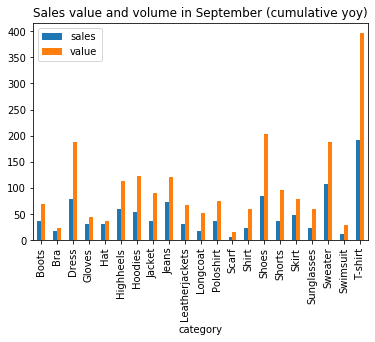

In [37]:
plot_cat_cumltv =pt_category_09_cumulative.plot(title='Sales value and volume in September (cumulative yoy)', kind='bar')
fig_cumlt = plot_cat_cumltv.get_figure()
fig_cumlt.savefig('/home/monika/Pulpit/Analiza ML Deep L/fig09.png')

In [38]:
print("Show sales in September and only chosen T-shirts")
display(df.loc[(df.month == "09") & (df.category == "T-shirt")].head(10))

Show sales in September and only chosen T-shirts


,id,date,product,category,value,month,sales
83,25244739299,05/09/19,IBLFRO,T-shirt,333,09,1
113,62249308599,13/09/18,HW491Y,T-shirt,268,09,1
290,69490938599,04/09/17,DU1VY1,T-shirt,147,09,1
296,98315097699,26/09/19,GGK9JS,T-shirt,54,09,1
391,69490938599,04/09/17,DU1VY1,T-shirt,147,09,1
397,98315097699,26/09/19,GGK9JS,T-shirt,54,09,1
460,49898553099,24/09/19,RJ95LI,T-shirt,283,09,1
594,40716369999,19/09/17,HFFNZW,T-shirt,187,09,1
616,12962901499,14/09/17,UPYRQT,T-shirt,166,09,1
647,45459884199,18/09/18,FX0FAV,T-shirt,166,09,1


In [39]:
dateLimit = '26/09/19'
catLimit = ["T-shirt", "Skirt"]
display(df.query('date > @dateLimit and category in @catLimit').head(10))

,id,date,product,category,value,month,sales
88,55363963399,29/03/19,KYOV3U,T-shirt,135,03,1
105,504190299,29/01/17,EMFBX6,Skirt,96,01,1
110,27642526599,28/11/19,32DCQA,T-shirt,42,11,1
185,17718100299,30/12/18,0QWACO,Skirt,149,12,1
209,94592148299,29/04/17,K9FI4E,Skirt,250,04,1
212,75715771099,26/12/17,JS62RN,T-shirt,282,12,1
227,78547146899,31/12/19,MJAPRV,T-shirt,252,12,1
260,1904675899,30/06/19,C1HO43,T-shirt,275,06,1
272,96548147199,27/08/19,OK5YAZ,T-shirt,72,08,1
310,94592148299,29/04/17,K9FI4E,Skirt,250,04,1


## 4. Analysis - show sales in 2017 

In [40]:
condition_17 =df['date'].str.endswith('17')

In [41]:
df_17=df[condition_17]

In [42]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3960 entries, 1 to 12117
Data columns (total 7 columns):
id          3960 non-null object
date        3960 non-null object
product     3960 non-null object
category    3960 non-null object
value       3960 non-null object
month       3960 non-null object
sales       3960 non-null int64
dtypes: int64(1), object(6)
memory usage: 247.5+ KB


In [43]:
column = df_17['value'].astype('int')

In [44]:
df_17['value']=column

/home/monika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
pt_sales_17 = df_17.pivot_table(index='month', values =['sales', 'value'], aggfunc={'sales':'sum', 'value':'sum'})

In [46]:
pt_sales_17['value']/=100

In [47]:
pt_sales_17

,sales,value
month,,
01,414,821.04
02,294,531.96
03,300,620.46
04,432,816.18
05,258,487.98
06,300,563.52
07,360,689.58
08,354,705.60
09,354,750.66


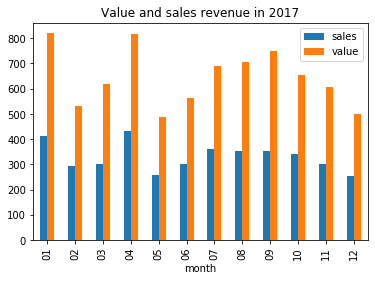

In [48]:
plot_17 = pt_sales_17.plot(title='Value and sales revenue in 2017', kind='bar')
fig_17 = plot_17.get_figure()
fig_17.savefig('/home/monika/Pulpit/Analiza ML Deep L/fig17.png', transparent = True)

## 5. Analysis - show sales in 2018

In [49]:
condition_18 =df['date'].str.endswith('18')

In [50]:
df_18=df[condition_18]

In [51]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3852 entries, 3 to 12118
Data columns (total 7 columns):
id          3852 non-null object
date        3852 non-null object
product     3852 non-null object
category    3852 non-null object
value       3852 non-null object
month       3852 non-null object
sales       3852 non-null int64
dtypes: int64(1), object(6)
memory usage: 240.8+ KB


In [52]:
column = df_18['value'].astype('int')

In [53]:
df_18['value']=column

/home/monika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
pt_sales_18 = df_18.pivot_table(index='month', values =['sales', 'value'], aggfunc={'sales':'sum', 'value':'sum'})

In [55]:
pt_sales_18['value']/=100

In [56]:
pt_sales_18

,sales,value
month,,
01,378,735.60
02,258,444.42
03,330,691.20
04,294,546.30
05,306,607.86
06,324,563.64
07,240,440.34
08,426,865.02
09,318,646.08


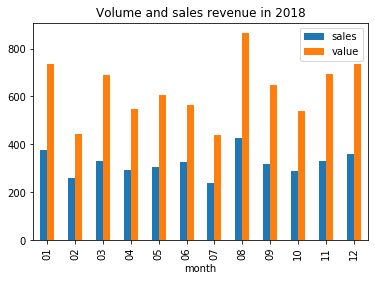

In [57]:
plot_18 = pt_sales_18.plot(title='Volume and sales revenue in 2018', kind='bar')
fig_18 = plot_18.get_figure()
fig_18.savefig('/home/monika/Pulpit/Analiza ML Deep L/fig18.png', transparent = True)

## 6.Analysis - show sales in 2019

In [58]:
condition =df['date'].str.endswith('19')

In [59]:
df_19=df[condition]

In [60]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4158 entries, 0 to 12115
Data columns (total 7 columns):
id          4158 non-null object
date        4158 non-null object
product     4158 non-null object
category    4158 non-null object
value       4158 non-null object
month       4158 non-null object
sales       4158 non-null int64
dtypes: int64(1), object(6)
memory usage: 259.9+ KB


In [61]:
column = df_19['value'].astype('int')

In [62]:
df_19['value']=column

/home/monika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
pt_sales = df_19.pivot_table(index='month', values =['sales', 'value'], aggfunc={'sales':'sum', 'value':'sum'})

In [64]:
pt_sales['value']/=100

In [65]:
pt_sales

,sales,value
month,,
01,330,603.36
02,348,685.14
03,270,556.74
04,336,609.90
05,414,836.34
06,378,761.46
07,438,872.52
08,348,611.28
09,360,730.68


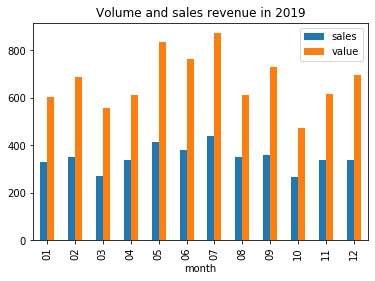

In [66]:
plot = pt_sales.plot(title='Volume and sales revenue in 2019', kind='bar')
fig = plot.get_figure()
fig.savefig('/home/monika/Pulpit/Analiza ML Deep L/fig19.png', transparent = True)


## 7. Analysis - show sales in September 2019

In [67]:
df_09_19=df_19[df_19['month']=='09']

In [68]:
df_09_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 37 to 12102
Data columns (total 7 columns):
id          360 non-null object
date        360 non-null object
product     360 non-null object
category    360 non-null object
value       360 non-null int64
month       360 non-null object
sales       360 non-null int64
dtypes: int64(2), object(5)
memory usage: 22.5+ KB


In [69]:
pt_category_09 = df_09_19.pivot_table(index='category', values ='value', aggfunc='sum')

In [70]:
pt_category_09=pt_category_09.sort_values(by='value', ascending=False)

In [71]:
pt_category_09

,value
category,
T-shirt,13680
Sweater,7050
Jeans,6678
Shoes,6624
Jacket,4830
Hoodies,4032
Dress,3984
Longcoat,3780
Boots,3420


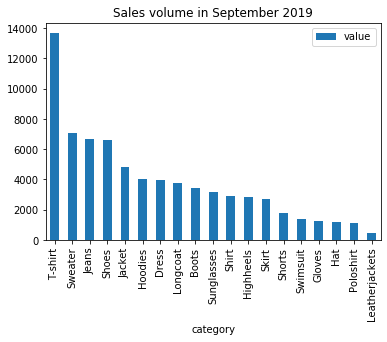

In [72]:

plot_cat =pt_category_09.plot(title='Sales volume in September 2019', kind='bar')
fig = plot_cat.get_figure()
fig.savefig('/home/monika/Pulpit/Analiza ML Deep L/fig092019.png')

## 8. Generate report (pdf)

In [73]:
 pip install WeasyPrint

You should consider upgrading via the '/home/monika/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [74]:
env = Environment(
    loader=FileSystemLoader("/home/monika/Pulpit/Analiza ML Deep L")
)

In [75]:
template = env.get_template("template.html")

In [76]:
context = {
    'pt_value':pt_sales.to_html(classes='mystyle'),
    'pt_category':pt_category_09.to_html(classes='mystyle'),
}

In [77]:
html_out=template.render(context)

In [78]:
HTML(string=html_out, base_url="/home/monika/Pulpit/Analiza ML Deep L").write_pdf("report.pdf")